In [2]:
import numpy as np
import pandas as pd

# Info
Housing data
- Realtor.com [data](https://www.realtor.com/research/data/)
    - Very big file for each zipcode
    - 2298453 rows
    - last date = 2016, July

Land
- Why use zipcodes [LINK](https://nces.ed.gov/programs/edge/docs/EDGE_NCES_LOCALE.pdf)
- Zipcodes(USPS) vs [ZCTA (Census)](https://www.census.gov/programs-surveys/geography/guidance/geo-areas/zctas.html)
- National Center for Educational Statistics Rural-Urban Data [Link](https://nces.ed.gov/programs/edge/Geographic/ZCTAAssignments)
- Info on assignment numbers [Link](https://nces.ed.gov/programs/edge/Geographic/LocaleBoundaries)

Zipcodes in Texas
- 2655 total
- Texas ZIP Codes is the range from 73301 to 88595


Data from [NCES (US Gov)](https://nces.ed.gov/programs/edge/Geographic/ZCTAAssignments)

### Record layout
The ZCTA Locale File Record Layout
 info at  [NCES PDF](https://nces.ed.gov/programs/edge/docs/EDGE_LOCALE_ZCTA_FILEDOC.pdf)
 
| Field    | Length | Type   | Description       |
|----------|--------|--------|-------------------|
|ZCTA5CEXX | 5      | String | ZCTA code (where XX represents the year of the last decennial census) |
|LOCALE    | 2      | String | Locale assignment |

In [3]:
# read sas7dbat file for zip code info
# https://pandas.pydata.org/docs/reference/api/pandas.read_sas.html
sas = pd.read_sas(r"C:\Users\Zachary\Downloads\2021_ZCTA\EDGE_ZCTALOCALE_2021_LOCALE.sas7bdat", encoding="utf8")
print(sas.dtypes)
# technically Zip Codes should not be ints but it makes things easier
sas = sas.astype("Int32")
print(sas.shape)
print(sas.dtypes)
print(sas["LOCALE"].value_counts())
sas.head(5)

ZCTA5CE20    object
LOCALE       object
dtype: object
(33791, 2)
ZCTA5CE20    Int32
LOCALE       Int32
dtype: object
42    12459
41     6931
43     6614
21     3598
11     1954
12      783
13      569
22      345
32      180
23      174
31      112
33       72
Name: LOCALE, dtype: Int64


,ZCTA5CE20,LOCALE
0,601,41
1,602,21
2,603,21
3,606,41
4,610,41


In [9]:
sas[sas["ZCTA5CE20"] == 77084]

,ZCTA5CE20,LOCALE
27263,77084,21


In [11]:
# Big load (~500MB)
# need to remove last row
# need to specify dtypes of Zip (str) and date

# _mm and _yy don't go all the way back so don't bother to read them
import_columns = ['month_date_yyyymm', 'postal_code', 'zip_name',  # string
                  'median_listing_price',
                  'active_listing_count', 'median_days_on_market',
                  'new_listing_count', 'price_increased_count', 'price_reduced_count',
                  'pending_listing_count', 'median_listing_price_per_square_foot', 'median_square_feet',
                  'average_listing_price', 'total_listing_count',
                  'pending_ratio',  # float
                  'quality_flag']
# slow, uses python engine
# import_converters = {'month_date_yyyymm': str, 'postal_code': str, 'zip_name': str, 'pending_ratio': float}
# housing_csv_df = pd.read_csv(r"C:\Users\Zachary\Downloads\RDC_Inventory_Core_Metrics_Zip_History.csv", usecols=import_columns, dtype='Int64', converters=import_converters, skipfooter=1)

# faster (~14s)
import_converters = {'month_date_yyyymm': str, 'postal_code': str, 'zip_name': str, 'pending_ratio': str}
housing_csv_df = pd.read_csv(r"C:\Users\Zachary\Downloads\RDC_Inventory_Core_Metrics_Zip_History.csv", usecols=import_columns, dtype='Int64', converters=import_converters)
housing_csv_df.drop(housing_csv_df.index[-1], inplace=True)
housing_csv_df["pending_ratio"] = pd.to_numeric(housing_csv_df["pending_ratio"], errors='coerce')
housing_csv_df["postal_code"] = housing_csv_df["postal_code"].astype('int32')
print("----")
print("Shape", housing_csv_df.shape)
print(housing_csv_df.dtypes)
housing_csv_df.head(3)

C:\Users\Zachary\AppData\Local\Temp\ipykernel_1544\3853038249.py:20: ParserWarning: Both a converter and dtype were specified for column month_date_yyyymm - only the converter will be used.
  housing_csv_df = pd.read_csv(r"C:\Users\Zachary\Downloads\RDC_Inventory_Core_Metrics_Zip_History.csv", usecols=import_columns, dtype='Int64', converters=import_converters)
C:\Users\Zachary\AppData\Local\Temp\ipykernel_1544\3853038249.py:20: ParserWarning: Both a converter and dtype were specified for column postal_code - only the converter will be used.
  housing_csv_df = pd.read_csv(r"C:\Users\Zachary\Downloads\RDC_Inventory_Core_Metrics_Zip_History.csv", usecols=import_columns, dtype='Int64', converters=import_converters)
C:\Users\Zachary\AppData\Local\Temp\ipykernel_1544\3853038249.py:20: ParserWarning: Both a converter and dtype were specified for column zip_name - only the converter will be used.
  housing_csv_df = pd.read_csv(r"C:\Users\Zachary\Downloads\RDC_Inventory_Core_Metrics_Zip_Histor

----
Shape (2298452, 16)
month_date_yyyymm                        object
postal_code                               int32
zip_name                                 object
median_listing_price                      Int64
active_listing_count                      Int64
median_days_on_market                     Int64
new_listing_count                         Int64
price_increased_count                     Int64
price_reduced_count                       Int64
pending_listing_count                     Int64
median_listing_price_per_square_foot      Int64
median_square_feet                        Int64
average_listing_price                     Int64
total_listing_count                       Int64
pending_ratio                           float64
quality_flag                              Int64
dtype: object


,month_date_yyyymm,postal_code,zip_name,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count,pending_ratio,quality_flag
0,202303,55006,"braham, mn",237500,2,39,4,0,0,4,138,1440,234300,5,1.7500,0
1,202303,27555,,141250,2,161,0,0,0,1,108,1246,141250,3,0.6667,1
2,202303,70706,"denham springs, la",387450,67,54,42,0,14,40,176,2181,372071,108,0.5896,1


In [12]:
housing_csv_df.tail(3)

,month_date_yyyymm,postal_code,zip_name,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count,pending_ratio,quality_flag
2298449,201607,2343,"holbrook, ma",359900,19,21,20,0,8,12,199,1850,387399,32,0.6316,<NA>
2298450,201607,67147,"valley center, ks",195000,41,70,24,0,4,<NA>,89,2240,237276,41,NaN,<NA>
2298451,201607,38116,"memphis, tn",73305,88,70,28,4,16,<NA>,48,1637,80781,88,NaN,<NA>


In [13]:
housing_csv_df.columns

Index(['month_date_yyyymm', 'postal_code', 'zip_name', 'median_listing_price',
       'active_listing_count', 'median_days_on_market', 'new_listing_count',
       'price_increased_count', 'price_reduced_count', 'pending_listing_count',
       'median_listing_price_per_square_foot', 'median_square_feet',
       'average_listing_price', 'total_listing_count', 'pending_ratio',
       'quality_flag'],
      dtype='object')

In [14]:
# Texas starts at 75000 and ends at 79999, don't need PO Boxes in El Paso at [88500, 88599] or Austin IRS at [73300, 73399]
# https://en.wikipedia.org/wiki/List_of_ZIP_Code_prefixes
texas_df = housing_csv_df[housing_csv_df["postal_code"].between(75000, 79999)]
texas_df.head()

,month_date_yyyymm,postal_code,zip_name,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count,pending_ratio,quality_flag
15,202303,78044,,250000,1,83,0,0,0,<NA>,122,2052,250000,1,NaN,1
19,202303,79853,"tornillo, tx",167000,1,141,0,0,0,<NA>,114,1460,167000,1,NaN,0
34,202303,78404,"corpus christi, tx",232428,29,53,18,2,6,16,164,1381,410768,45,0.5517,1
62,202303,77418,"bellville, tx",390000,35,61,12,0,8,12,198,2132,588422,45,0.3333,0
71,202303,77414,"bay city, tx",243968,130,88,34,4,14,28,143,1607,286698,156,0.2154,0


In [15]:
len(texas_df["postal_code"].unique())

1988

In [4]:
land_type = sas[sas["ZCTA5CE20"].between(75000, 79999)]
land_type = land_type.rename(columns={"ZCTA5CE20": "zipcode"})
len(land_type["zipcode"].unique())

1989

In [29]:
# figure out the different zip code
print("In land_type but not texas_df housing data")
set_diff = np.setdiff1d(land_type["zipcode"].unique(), texas_df["postal_code"].unique(), assume_unique=True)
print(len(set_diff))
set_diff
# # pd.Series(land_type["zipcode"].unique()).compare(pd.Series(texas_df["postal_code"].unique()))

In land_type but not texas_df housing data
85


array([75251, 75261, 75270, 75390, 75429, 75641, 75659, 75680, 75884,
       75886, 75903, 75962, 76127, 76129, 76203, 76311, 76402, 76452,
       76523, 76573, 76596, 76597, 76598, 76599, 76798, 76824, 76836,
       76880, 76908, 76909, 77204, 77341, 77342, 77436, 77467, 77507,
       77843, 77875, 77973, 78029, 78062, 78075, 78111, 78143, 78144,
       78150, 78234, 78236, 78243, 78338, 78360, 78419, 78591, 78658,
       78677, 78712, 78802, 78841, 78843, 78851, 78871, 79008, 79051,
       79066, 79073, 79093, 79111, 79223, 79234, 79236, 79251, 79259,
       79326, 79402, 79406, 79699, 79721, 79730, 79754, 79769, 79770,
       79908, 79916, 79918, 79920], dtype=object)

In [30]:
print("In texas_df housing data but not land_type")
set_diff2 = np.setdiff1d(texas_df["postal_code"].unique(), land_type["zipcode"].unique(), assume_unique=True)
print(len(set_diff2))
set_diff2

In texas_df housing data but not land_type
84


array([76503, 75772, 77626, 77726, 78115, 79105, 76485, 78335, 78553,
       78502, 75097, 75832, 78568, 78960, 75802, 78522, 76533, 77353,
       77720, 75444, 79712, 77639, 75978, 77305, 75636, 75504, 76369,
       78269, 78246, 75151, 79708, 78551, 75483, 79740, 77850, 75963,
       77333, 75713, 78505, 75660, 77842, 75443, 76803, 75712, 75685,
       78853, 78523, 78765, 75014, 75047, 78054, 79120, 77725, 79710,
       79760, 75425, 76199, 78952, 78764, 76465, 75017, 78268, 77549,
       77404, 79768, 77542, 77870, 78767, 78673, 76206, 77967, 79711,
       77631, 75456, 77325, 78646, 79954, 75990, 75011, 77834, 77452,
       77243, 75606, 76468])

In [ ]:
# want to plot zip codes or ZCTA?, need shapefiles
# from census 2020
# https://www2.census.gov/geo/tiger/TIGER2020/ZCTA520/
# other potential shapes
# https://data.capitol.texas.gov/dataset/2020-census-geography

# Shapefile is huge >800MB so it needs to be limited to texas
# https://mangomap.com/industries/web-mapping/tutorials/remove-unwanted-regions-from-map-data.html

# Plotting

I want to plot with geopandas to show different zip codes/counties. I need to use shapefiles, but doing it manually is too much work for just pandas and matplotlib.

Get shapefiles from [US Census](https://www.census.gov/cgi-bin/geo/shapefiles/index.php)

Documentation of fields [Census PDF](https://www2.census.gov/geo/pdfs/maps-data/data/tiger/tgrshp2020/)

State FIPS code
- Texas	48	TX

[Geopandas plot documentation](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html)

## packages added to my 3.9 environment
- `conda install -c conda-forge fiona`
    - Need `fiona` or `pyogrio` to use `geopandas.read_file()`

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [6]:
# how to plot?
# https://stackoverflow.com/questions/58043978/display-data-on-real-map-based-on-postal-code
# https://stackoverflow.com/questions/72033166/how-do-i-make-a-chloropleth-map-zip-code-to-column-in-folium
# Path to shp file
# "C:\Users\Zachary\Downloads\tl_2020_us_zcta520\tl_2020_us_zcta520.shp"
# needs fiona or pyogrio
# probably needs GDAL
# conda install -c conda-forge gdal
# conda install -c conda-forge fiona

# takes 40 sec to read
df_zipcodes = gpd.read_file(r'C:\Users\Zachary\Downloads\tl_2020_us_zcta520\tl_2020_us_zcta520.shp')
df_zipcodes.head()

,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,35592,35592,B5,G6350,S,298552385,235989,+33.7427261,-088.0973903,"POLYGON ((-88.24735 33.65390, -88.24713 33.654..."
1,35616,35616,B5,G6350,S,559506992,41870756,+34.7395036,-088.0193814,"POLYGON ((-88.13997 34.58184, -88.13995 34.582..."
2,35621,35621,B5,G6350,S,117838488,409438,+34.3350314,-086.7270557,"POLYGON ((-86.81659 34.34960, -86.81649 34.349..."
3,35651,35651,B5,G6350,S,104521045,574316,+34.4609087,-087.4801507,"POLYGON ((-87.53087 34.42492, -87.53082 34.429..."
4,36010,36010,B5,G6350,S,335675180,236811,+31.6598950,-085.8128958,"POLYGON ((-85.95712 31.67744, -85.95676 31.677..."


In [7]:
# rename columns and convert zipcode to int
df_zipcodes.rename(columns={'ZCTA5CE20':'zipcode'}, inplace=True)
df_zipcodes["zipcode"] = df_zipcodes["zipcode"].astype(int)

In [8]:
df_tx_zipcodes = df_zipcodes[df_zipcodes["zipcode"].between(75000, 79999)]
print(len(df_tx_zipcodes["zipcode"].unique()))

1989


In [9]:
print("In df_tx_zipcodes housing data but not land_type")
gov_diff = np.setdiff1d(df_tx_zipcodes["zipcode"].unique(), land_type["zipcode"].unique(), assume_unique=True)
print(len(gov_diff))
gov_diff

In df_tx_zipcodes housing data but not land_type
0


array([], dtype=int32)

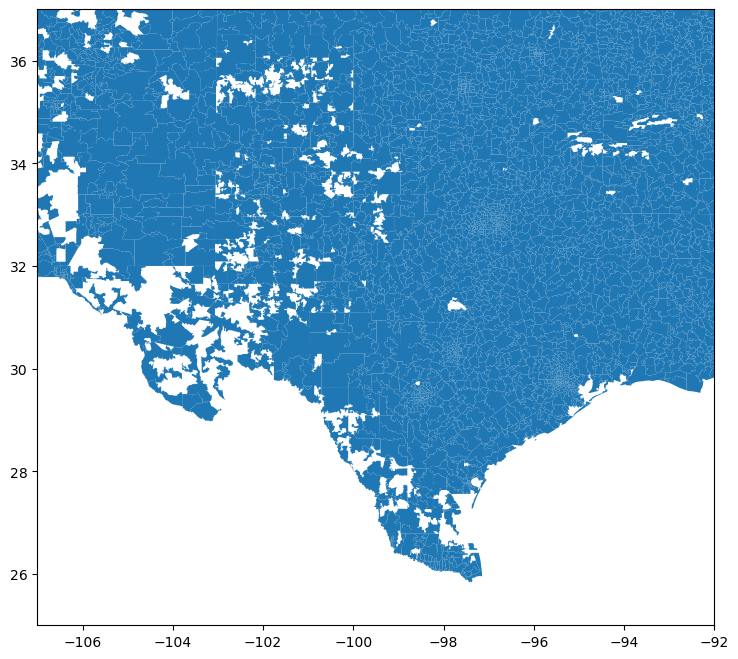

In [20]:
fig, ax = plt.subplots(figsize=(9, 8))
# df_zipcodes[df_zipcodes["zipcode"].between(75000, 79999)].plot(ax=ax)
df_zipcodes.plot(ax=ax)
ax.set_xlim(-107, -92)
ax.set_ylim(25, 37)
plt.show()

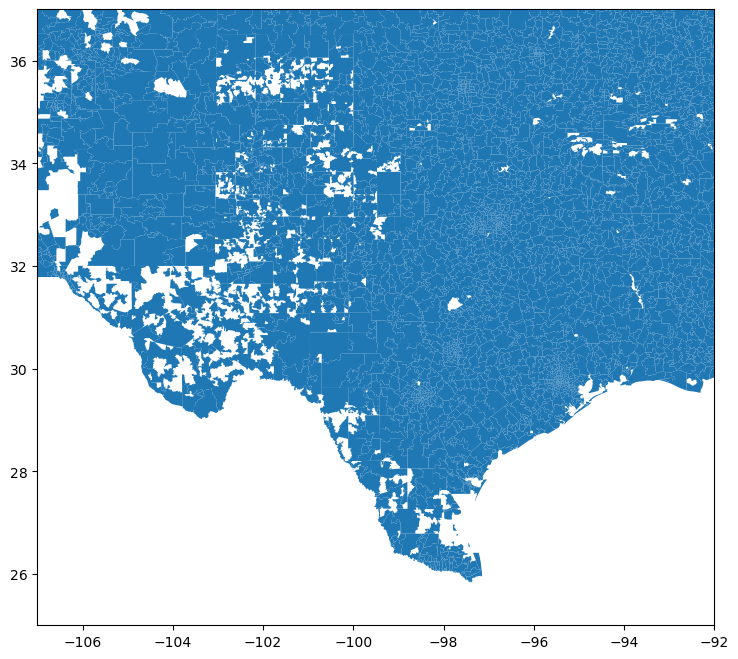

In [21]:
df_zipcodes_19 = gpd.read_file(r'C:\Users\Zachary\Downloads\tl_2019_us_zcta510\tl_2019_us_zcta510.shp')
df_zipcodes_19.rename(columns={'ZCTA5CE10':'zipcode'}, inplace=True)
df_zipcodes_19["zipcode"] = df_zipcodes_19["zipcode"].astype(int)
fig, ax = plt.subplots(figsize=(9, 8))
# df_zipcodes[df_zipcodes_19["zipcode"].between(75000, 79999)].plot(ax=ax)
df_zipcodes_19.plot(ax=ax)
ax.set_xlim(-107, -92)
ax.set_ylim(25, 37)
plt.show()

See [this](https://www.reddit.com/r/MapPorn/comments/s4slm0/places_in_the_us_without_zip_codes_these_areas/) for potential reasons there is 'missing' data.

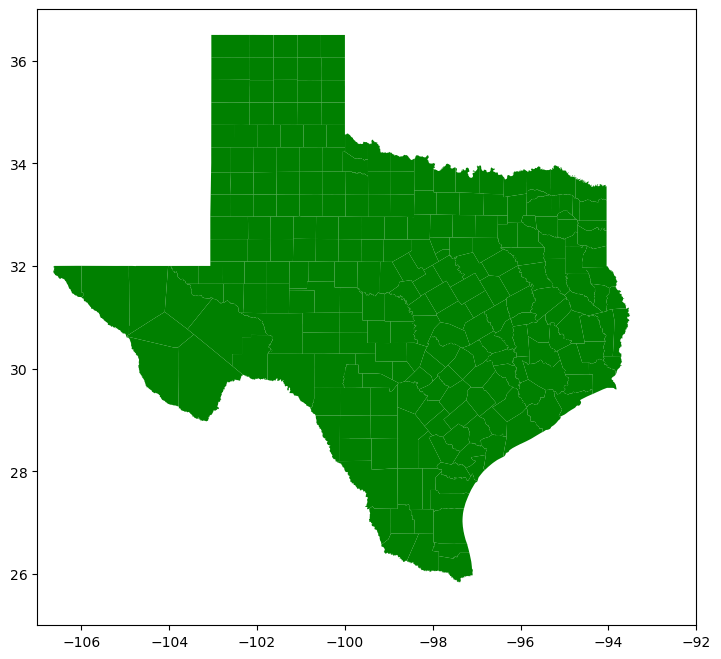

In [10]:
df_county = gpd.read_file(r'C:\Users\Zachary\Downloads\tl_2020_us_county\tl_2020_us_county.shp')
# df_county.head()
# df_county.dtypes
df_county["STATEFP"] = df_county["STATEFP"].astype(int)
fig, ax_county = plt.subplots(figsize=(9, 8))
df_county[df_county["STATEFP"] == 48].plot(ax=ax_county, color="green")
ax_county.set_xlim(-107, -92)
ax_county.set_ylim(25, 37)
plt.show()

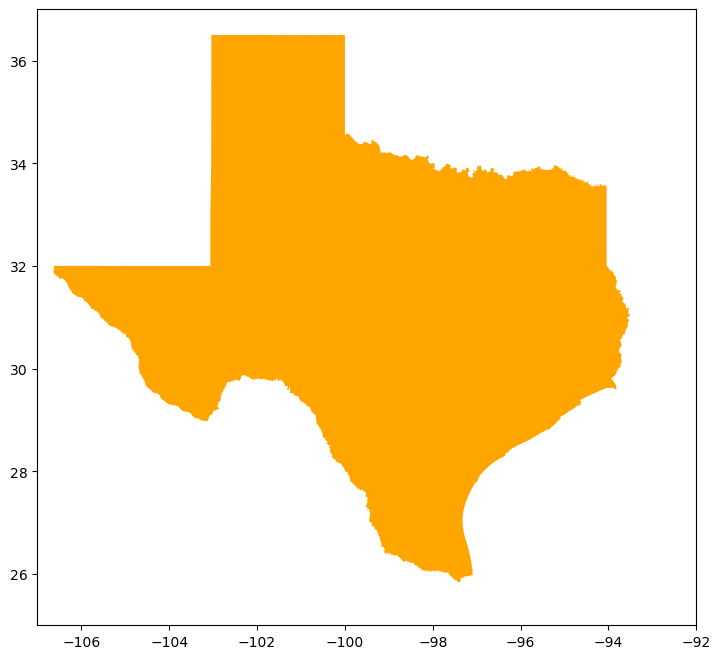

In [11]:
df_state = gpd.read_file(r"C:\Users\Zachary\Downloads\tl_2020_us_state\tl_2020_us_state.shp")
# df_state.head()
# df_state.dtypes
df_state[["REGION", "DIVISION", "STATEFP"]] = df_state[["REGION", "DIVISION", "STATEFP"]].astype(int)
fig, ax_state = plt.subplots(figsize=(9, 8))
df_state[df_state["STATEFP"] == 48].plot(ax=ax_state, color="orange")
ax_state.set_xlim(-107, -92)
ax_state.set_ylim(25, 37)
plt.show()

In [62]:
# This method would be too time consuming to do it by hand. Use Geopandas instead.

# try different way
import shapefile as shp
sf = shp.Reader(r"C:\Users\Zachary\Downloads\tl_2020_us_zcta520\tl_2020_us_zcta520.shp")

# get directly from here
# https://towardsdatascience.com/mapping-with-matplotlib-pandas-geopandas-and-basemap-in-python-d11b57ab5dac
def read_shapefile(sf):
    #fetching the headings from the shape file
    fields = [x[0] for x in sf.fields][1:]
    #fetching the records from the shape file
    records = [list(i) for i in sf.records()]
    shps = [s.points for s in sf.shapes()]
    #converting shapefile data into pandas dataframe
    df = pd.DataFrame(columns=fields, data=records)
    #assigning the coordinates
    df = df.assign(coords=shps)
    return df

df_shapefile = read_shapefile(sf)
print(df_shapefile.shape)
df_shapefile.sample(3)

(33791, 10)


,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,coords
18456,51044,51044,B5,G6350,S,87221168,163307,+42.3061740,-095.9181223,"[(-96.000467, 42.308411), (-96.000471, 42.3087..."
17788,35574,35574,B5,G6350,S,257430187,117812,+33.5554408,-087.9689830,"[(-88.045715, 33.650563), (-88.045271, 33.6510..."
4515,65233,65233,B5,G6350,S,367646059,7099215,+38.9106953,-092.7239148,"[(-92.89654, 38.94046), (-92.895181, 38.940432..."


In [12]:
tx_zip_land_data = df_tx_zipcodes.merge(land_type, on="zipcode")
tx_zip_land_data["LOCALE"] = tx_zip_land_data["LOCALE"].astype(int)
print("Shape", tx_zip_land_data.shape)
print(tx_zip_land_data.dtypes)
tx_zip_land_data["LOCALE"] = tx_zip_land_data["LOCALE"].map({11: 1, 12: 2, 13: 3,
                                                             21: 4, 22: 5, 23: 6,
                                                             31: 7, 32: 8, 33: 9,
                                                             41: 10, 42: 11, 43: 12})
tx_zip_land_data.head()

Shape (1989, 11)
zipcode          int32
GEOID20         object
CLASSFP20       object
MTFCC20         object
FUNCSTAT20      object
ALAND20          int64
AWATER20         int64
INTPTLAT20      object
INTPTLON20      object
geometry      geometry
LOCALE           int32
dtype: object


,zipcode,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry,LOCALE
0,79835,79835,B5,G6350,S,22937438,417567,+31.9356531,-106.5960888,"POLYGON ((-106.62974 31.92657, -106.62857 31.9...",10
1,79837,79837,B5,G6350,S,2816585533,13321362,+32.0952608,-105.1624069,"POLYGON ((-105.66123 32.22545, -105.66122 32.2...",12
2,79922,79922,B5,G6350,S,20868598,220641,+31.8103693,-106.5559638,"POLYGON ((-106.60569 31.84623, -106.60531 31.8...",1
3,77044,77044,B5,G6350,S,101257280,19516586,+29.9063122,-095.1805606,"POLYGON ((-95.24057 29.89875, -95.23708 29.902...",10
4,77059,77059,B5,G6350,S,23915816,153131,+29.6135284,-095.1186666,"POLYGON ((-95.15403 29.62699, -95.15390 29.626...",1


In [21]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap

# 11,12,13,21,22,23,31,32,33,41,42,43
# 1,2,3,4,5,6,7,8,9,10,11,12
land_color_list = ["#eb348c", "#fc4eda", "#e880ff",  # urban
                   "#ff9a26", "#fac852", "#fff759",  # suburban
                   "#1a2ca3", "#5477de", "#6cade6",  # town
                   "#85ed7b", "#59c24f", "#2e8f25",  # rural
                   ]
land_color_map = ListedColormap(land_color_list)

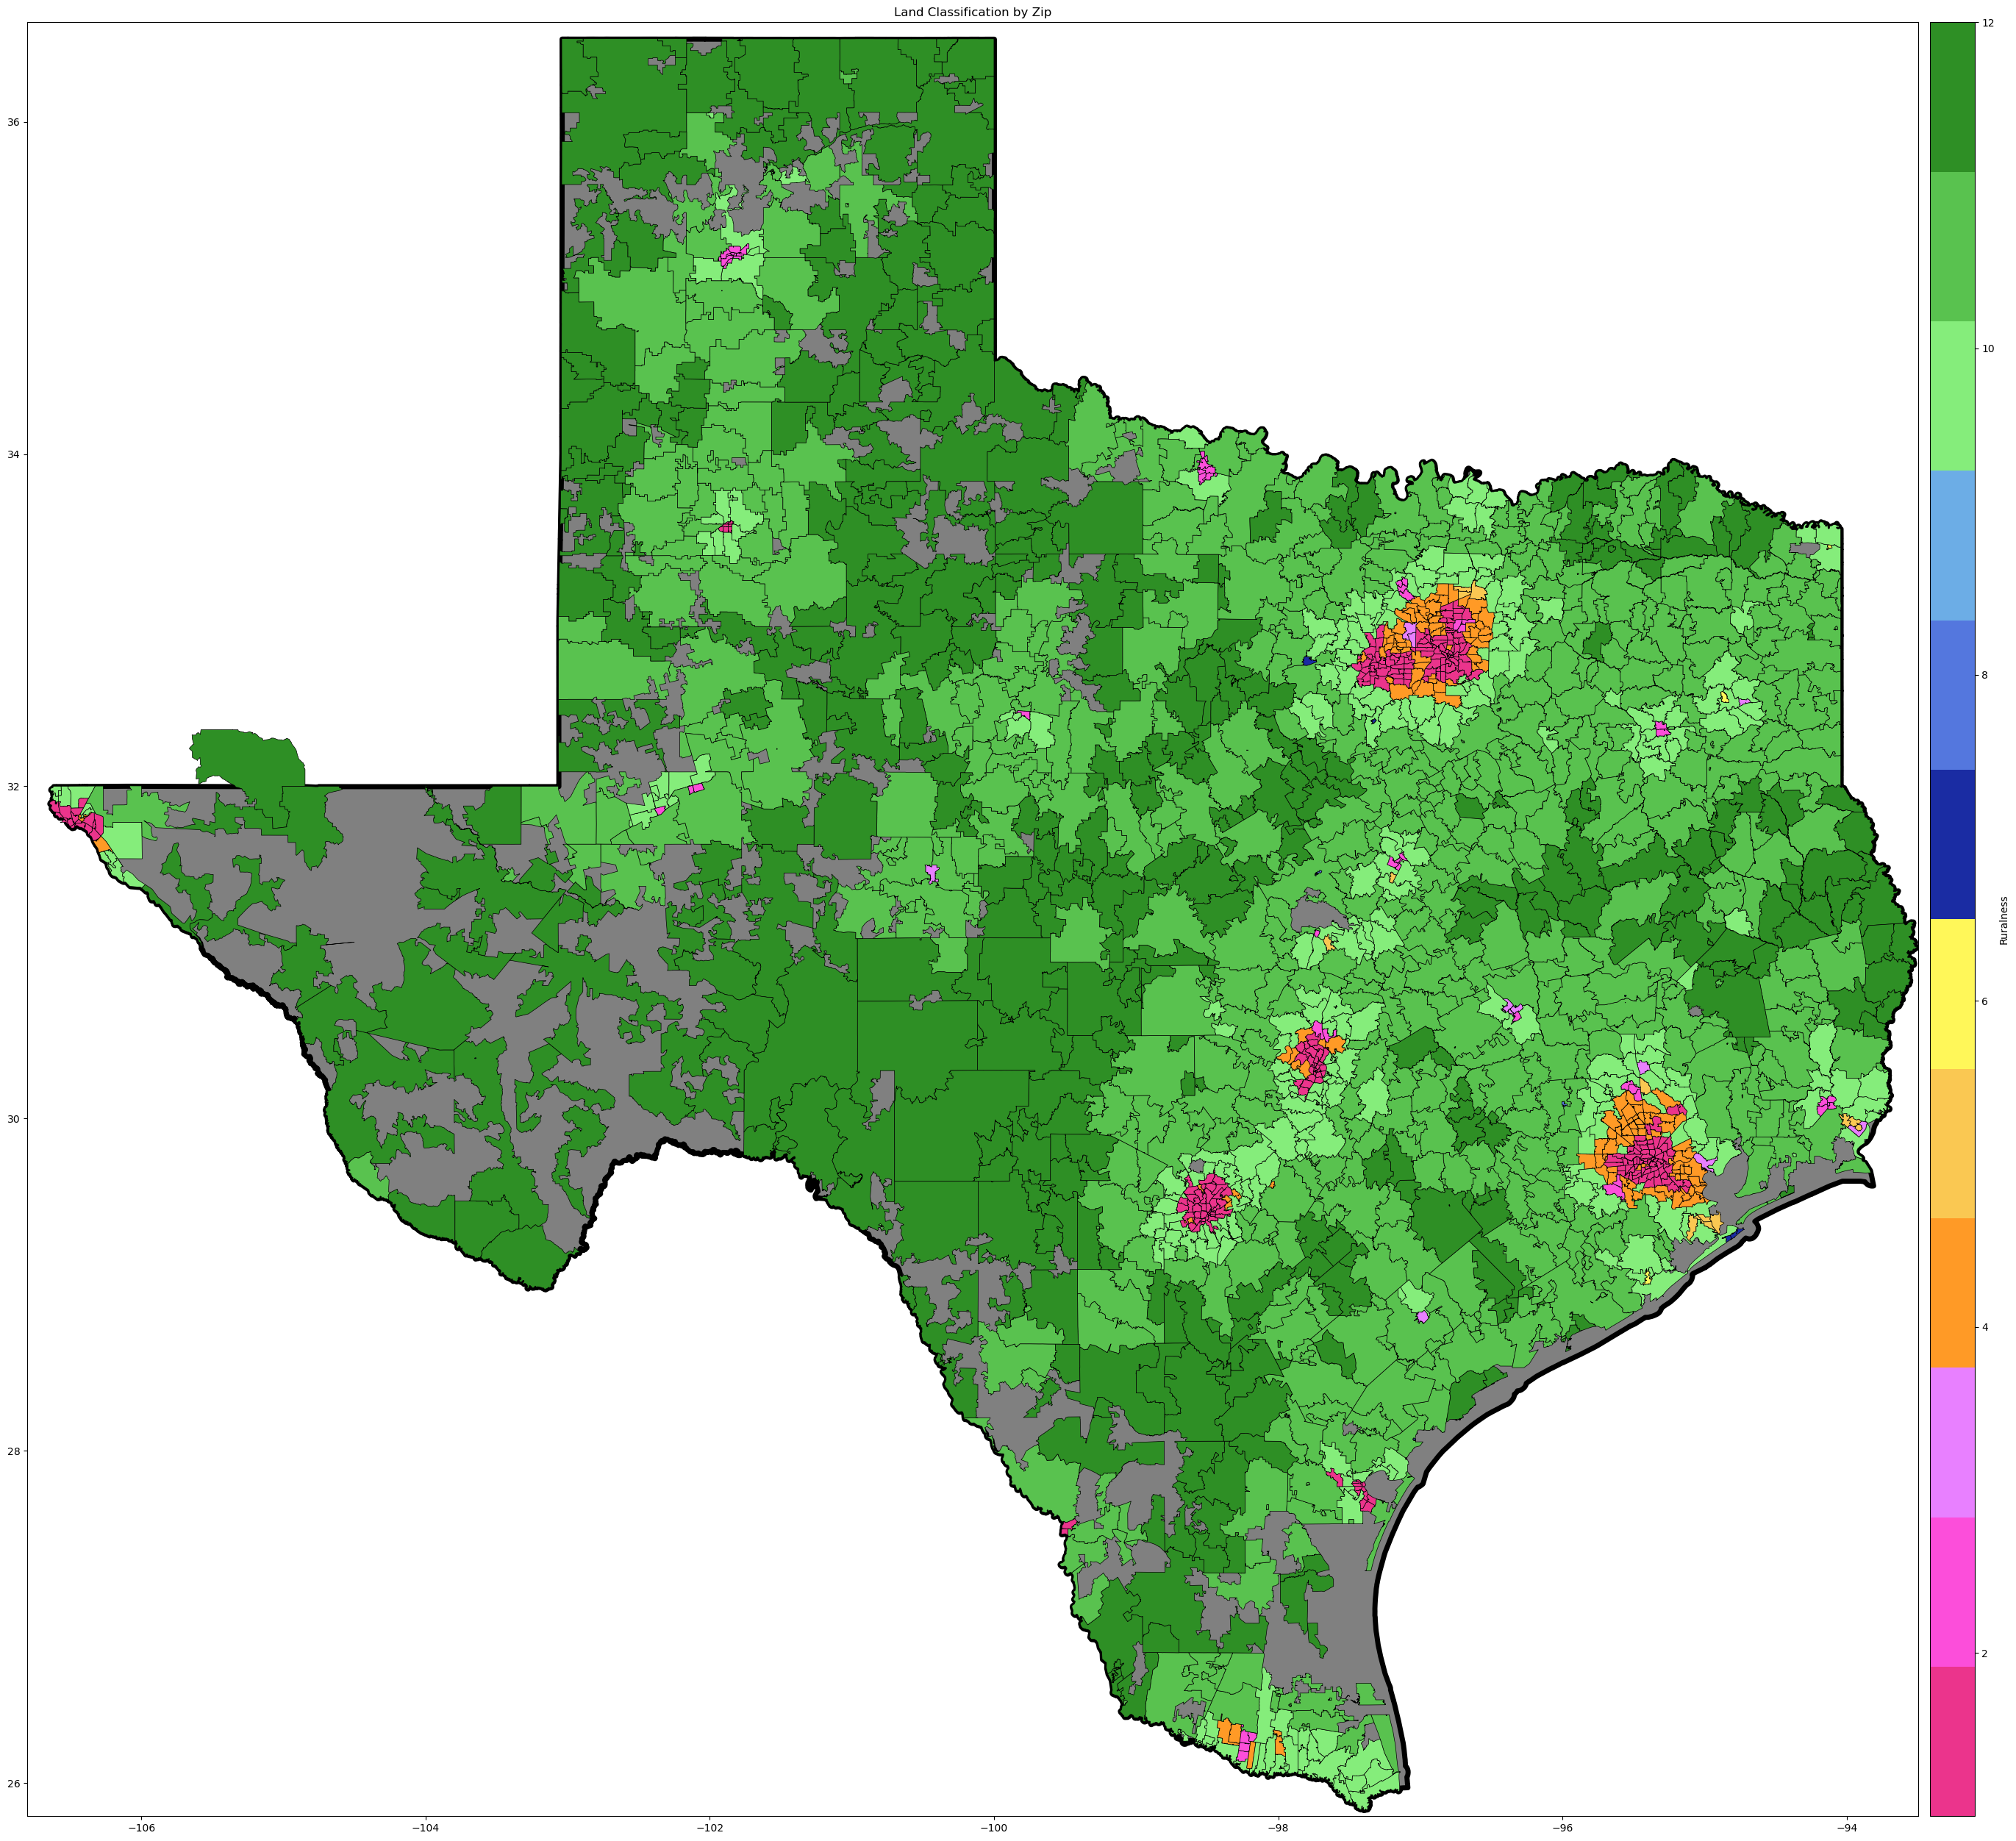

In [22]:
# see https://geopandas.org/en/latest/docs/user_guide/mapping.html
fig, ax = plt.subplots(figsize=(30, 30))
plt.subplots_adjust(left=0.04, right=0.995, top=0.96, bottom=0.08)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=-2)
base = df_state[df_state["STATEFP"] == 48].plot(ax=ax, color="gray", edgecolor='black', linewidth=5)
tx_zip_land_data.plot(ax=ax,
                      column='LOCALE',
                      edgecolor="black",
                      linewidth=0.5,
                      cmap=land_color_map,
                      vmin=1,
                      vmax=12,
                      legend=True,
                      cax=cax,
                      legend_kwds={'label': "Ruralness", 'orientation': "vertical"})
ax.set_title("Land Classification by Zip")
ax.set_xlim(-106.8, -93.5)
ax.set_ylim(25.8, 36.6)
plt.show()